# Fashion MNIST classification

This notebook is based on Alura's course [Deep Learning parte 1: Keras](https://cursos.alura.com.br/course/deep-learning-introducao-com-keras) (Deep Learning Part 1: Keras) by Cássia Sampaio.

All code was written in Python 3 using Google Colab.

**For more information, check the README**

---

# Artificial Neural Networks

To correctly classify clothes images, we will use artificial neural networks (ann) or neural networks (NN). The NN mimics the function of brain cells, which receives input signals from dendrites, transform and send them to another cell via axons. Under the deep learning terminology, the brain cells are called nodes, the dendrites are the input layer, the axons are the output layer, and the information transformations occur in the hidden layer, which is not the best name for it but the idea is that we "cannot see" the transformation inside of it. All the nodes of layer **j** are connected to each node from layer **j+1**. 

Here is a NN representation ([source](https://www.databricks.com/glossary/neural-network)):

![title](./img/neural1.jpg)

Since we are dealing with image classification, the inputs are matrices (28x28 to be precise) and it is necessary to convert it, or flatten it, into a one-dimensional-like format, that each node is a pixel. The transformation between layers is done using weights, also known as parameters. Then, in the hidden layers (yes, it could have several of them), each node applies the activation function. In our case, we use ReLU (we are going to discuss it later). Finally, the output layer has the exact number of output classes with each node carrying the probability of them being the correct outcome. 

## ReLU Activation function

ReLU stands for **rectified linear unit** and it is defined as

$f(x) = max(0,x)$, i.e. if the input is a negative number, it returns 0 and keeps the positive value. The function is non-differentiable at zero and, in this case, either 0 or 1 is chosen arbitrarily.

## Softmax function

The softmax function is used at the last hidden layer and it transforms a vector of K integers into a probability distribution between 0 and 1 that sum up to 1. This function is given by

$σ(z)_{i} = \frac{e^{z_{i}}}{\sum^{K}_{j=1} e^{z_{j}}}$ for i = 1,...,K, z = ($z_{1},...,z_{K}$) $\in \mathbb{R}^{K}$.  

## Dropout layer

The dropout layer randomly sets some node rates to 0 to prevent overfitting, i.e., the model adapts very well to the training set and has poor performance in the test set. In our case, we dropped out 20% of all of them.

Before building the model, let's explore the data set.

---

# EDA

In [ ]:
# Importing libraries

import matplotlib.pyplot as plt
import numpy as np
import tensorflow
from tensorflow import keras

In [ ]:
# Loading clothes data set

dataset = keras.datasets.fashion_mnist
((X_train, y_train),(X_test, y_test)) = dataset.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Checking the size of the training set

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (60000, 28, 28)
Test set size: (10000, 28, 28)


There are 60000 training images for training and 10000 for testing in 28x28 matrices,

In [ ]:
# Checking the size of the test set

print("Training set size:", y_train.shape)
print("Test set size:", y_test.shape)

Training set size: (60000,)
Test set size: (10000,)


The test sets also have 60000 and 10000 for identification training and test sets, respectively. Now, let's take a look at the images in the training set.

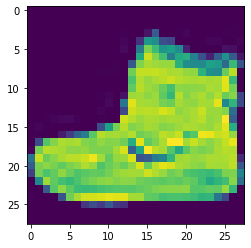

In [ ]:
# Displaying one imagem from training set

plt.imshow(X_train[0])
plt.show()

The variables y_train and y_test store the identification of the images. Let's look how many there are and their corresponding images.

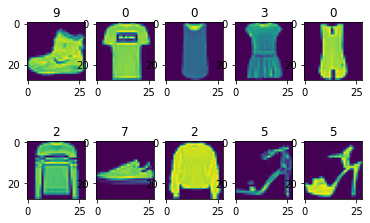

In [ ]:
# Displaying several images from the training set and their identifications

for image in range(10):
  plt.subplot(2,5, image+1)
  plt.imshow(X_train[image])
  plt.title(y_train[image])

In [ ]:
# Printing the max and min number of identifications

print("Max: ", y_train.max())
print("Min: ", y_train.min())

Max:  9
Min:  0


The data set uses numbers from 0 to 9 to separate the images into ten types of identification. Looking at the [Fashion MNIST Github repository](https://github.com/zalandoresearch/fashion-mnist#labels), there is a table containing information about the labels used in the data set:

|Label|Description|
|-----|-----------|
|0|T-shirt/top|
|1|Trouser|
|2|Pullover|
|3|Dress|
|4|Coat|
|5|Sandal|
|6|Shirt|
|7|Sneaker|
|8|Bag|
|9|Ankle boot|

--- 

# Building the model

Using the Keras framework, the model will have sequential layers: the first one will have 256 nodes and the last one 10 due to the number of labels in the data set. Also, it is necessary to flatten the images, i.e., converting them from a 28x28 matrix into a one-dimensional array. We need to include 20% dropout nodes, so these nodes will be set as 0 and the other ones will be set as $\frac{1}{1-rate}$, which, in this case, the rate = 0.2. This step is recommended to avoid overfitting.

# Optimizers

## Adam

Adam stands for adaptative moment estimation and computes adaptive learning rates for every parameter (or weights) based on the cost function J($Θ). It converges faster than the gradient descent by using the first and second gradient momentum (steps of the gradient descent towards the global minimum) and they are defined as

$m_{t} = β_{1}m_{t-1} + (1-β_{1})g_{t}$ and 
$v_{t} = β_{2}v_{t-1} + (1-β_{2})g_{t}^{2}$ respectively where m is the estimate of the first momentum (the mean), v is the estimate of the second momentum (the uncentered variance), $β_{1}$ and $β_{2}$ are the exponential decay rates for the moment estimates, and the $g_{t}$ is the gradient of the stochastic objective function with parameters $θ$. Both $m_{t}$ and $v_{t}$ are initialized with 0, they are biased towards zero. Thus it is necessary to introduce the correction, given by

$\hat{m_{t}} = \frac{m_{t}}{1-β^{t}_{1}}$ and
$\hat{v_{t}} = \frac{v_{t}}{1-β^{t}_{2}}$. 

Finally, the parameters are updated as follows:

$θ_{t+1} = \theta_{t} - \frac{\alpha - \hat{m_{t}}}{\sqrt{\hat{v_{t}}} +ϵ}$, where $\alpha$ is the stepsize and ϵ is a small constant to numerical stability.

## Sparse Categorical Cross-entropy

Sparse Categorical Crossentropy is a loss function we want to minimize during the model training. Image classification is a multi-label classification, thus the cross-entropy is given by:

$Loss = - ∑_{i}^{n} y_{i} \cdot ln(\hat{y_{i}})$, where n is the output size, the $y_{i}$ is the true or expected value, and the $\hat{y_{i}}$ is the predicted value. The sparse cross-entropy will return an array-like object only with the label and its probability, instead of a list with all the categories and their probabilities. 

## Backpropagation

Backpropagation is a way to calculate unknown parameters of a neural network starting from the end (close to the output layer) and running the NN backward. First, it initializes all the weights randomly and biases with zeros. Then, the model does the calculations to get the output and uses the sum of the squared errors (SSR), defined as

$SSR = \sum_{i}^{n}(y_{i}-\hat{y_{i}})$,

to optimize the parameters by applying the gradient descent with respect to the weights and biases, and the new parameter values are given by

new value = old value - $\frac{derivates}{\text{learning rate}}$. 

This process repeats until the parameters are optimized or it reaches the maximum number of iterations.



Now we know the main mathematical part of a NN, let's build the model. 

In [ ]:
# Building the model

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(256, activation=tensorflow.nn.relu))
model.add(keras.layers.Dropout(0.2, seed=42))
model.add(keras.layers.Dense(10, activation=tensorflow.nn.softmax))

In [ ]:
# Training the model

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.8751 - accuracy: 0.6352
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8397 - accuracy: 0.6841
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7871 - accuracy: 0.7112
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7618 - accuracy: 0.7214
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7180 - accuracy: 0.7353


After training the model 5 times, the loss is around 0.7. It is possible to decrease this value by normalizing the images. Since they are in a grayscale format, each pixel could hold values from 0 (white) to 255 (black), we can reduce these interval numbers between 0 and 1, thus reducing the loss. Let's normalize all the images and train the model once more. 

In [ ]:
# Images normalization

X_train = X_train/float(255)
X_test = X_test/float(255)

In [ ]:
# Training the model with normalized images

history = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.8337 - accuracy: 0.7015 - val_loss: 0.4667 - val_accuracy: 0.8325
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4958 - accuracy: 0.8196 - val_loss: 0.4315 - val_accuracy: 0.8433
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4396 - accuracy: 0.8397 - val_loss: 0.3908 - val_accuracy: 0.8532
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4105 - accuracy: 0.8489 - val_loss: 0.3719 - val_accuracy: 0.8638
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3917 - accuracy: 0.8561 - val_loss: 0.3633 - val_accuracy: 0.8654


The loss value is now around 0.35, which is less than the previous model and so did the accuracy.

Now, let's test the model.

In [ ]:
# Test the model

y_pred = model.predict(X_train)

1875/1875 [==============================] - 3s 1ms/step


In [ ]:
# Model evaluation

model_loss, model_accuracy = model.evaluate(X_train, y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.3398 - accuracy: 0.8726


The model evaluation gave us around 0.34 of loss and an accuracy of approximately 0.87. Let's check the history of accuracies and loss values in each epoch.

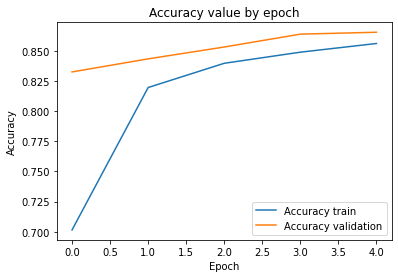

In [ ]:
# PLotting the accuracies history

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Accuracy value by epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Accuracy train", "Accuracy validation"])
plt.show()

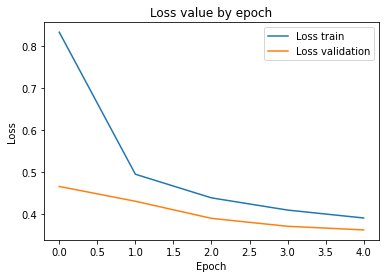

In [ ]:
# PLotting the losses history

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss value by epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Loss train", "Loss validation"])
plt.show()

The graphs show both accuracies and losses value decreased over epochs, which for the former metric is not good but for the latter one is great. Plus, both values for both metrics are similar which discards the chance of overfitting (when the model has a great performance over the training set and poor results in the unseen data) or underfitting (when the model has poor performance in the training set).

---